In [1]:
import glob,os
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from nltk.corpus import stopwords

stopwords = [word for word in set(stopwords.words('english'))] # get stopwords from nltk

In [2]:
# Text Processing Functions
def preprocess(s, lower=True, strip_punc=True, stopwords=False):
    '''
    Input: String, lower(Bool), strip_punc(Bool)
    Output: List of Strings
    '''
    punc = '.-,?<>:;"\'!%'
    if isinstance(s, str):
        s = s.split() # tokenize text
    if lower:
        s = [t.lower() for t in s]
    if strip_punc:
        s = [t.strip(punc) for t in s]
    if stopwords != False:
        s = [t for t in s if t not in stopwords]
        
    return s

def token_frequency(tokens, tf= None, relative=False):
    """
    Inputs: 
        tokens = List of Strings or None
        tf = dict or None
        relative = Boolean
    Output: 
        Dictionary of a token frequencies
    """
    tf = {} if tf==None else tf
    
    if len(tf) != 0 and relative==True:
        if isinstance(list(tf.items())[0][1], float):
            print('WARNING: Adding raw counts to relative frequency')
            return tf
        
    for token in tokens:
        if token in tf:
            tf[token] += 1
        else:
            tf[token] = 1
    
    if relative:
        total = sum([v for k,v in tf.items()])
        tf = {k:v/total for k, v in tf.items()}
          
    return tf


def get_tokens(filenames):
    for file in filenames:
        text = preprocess(open(file,'r').read(),stopwords=stopwords)
        yield text

In [3]:
# Get file paths to texts
filenames = glob.glob('data/*.txt')
labels = [os.path.split(file)[1][:-4].title() for file in filenames] # extract labels from file paths

In [6]:
# Find Document Frequency of all tokens in corpus
def mycount(corpus_freqs, token):
    corpus_freqs[token]+=1

token_freqs = defaultdict(int) # define document frequency dictionary

# loop through all tokens and calc document frequency
[mycount(token_freqs, token) for text in get_tokens(filenames) for token in text]

token_freqs = {k:v for k,v in sorted(list(doc_freqs.items()), key=lambda x: x[1], reverse=True)}

In [8]:
# Find Document Frequency of all tokens in corpus
def mycount(corpus_freqs, token):
    corpus_freqs[token]+=1

doc_freqs = defaultdict(int) # define document frequency dictionary

# loop through all tokens and calc document frequency
[mycount(doc_freqs, token) for text in get_tokens(filenames) for token in set(text)]

# store top tokens if document frequency is 10 in top_words array 
top_words = [word for word,c in doc_freqs.items() if c == 10]

# take 200 words from top words

#topn = 200
#top_words = top_words[:topn]

1647


In [29]:
# get relative token frequencies for each text in corpus 
rel_freqs = [token_frequency(tokens,relative=True) for tokens in get_tokens(filenames)]

# filter freqs to only include words in top words of the entire corpus
filtered_freqs = [{k:v for k,v in freq.items() if k in top_words} for freq in rel_freqs]

In [30]:
# store book vectors in a pandas DataFrame
vectors_df = pd.DataFrame(filtered_freqs,index=labels).fillna(0)
vectors_df.head()

,able,afraid,allowed,although,arrived,attacked,back,battered,bear,bitterly,...,warning,waste,wearing,weeds,went,wet,winter,would,yesterday,young
Tolkien_Lor2,0.000119,0.000357,0.000119,0.000026,0.000066,0.000026,0.004615,0.000013,0.000370,0.000013,...,0.000079,0.000119,0.000040,0.000066,0.002525,0.000238,0.000132,0.004800,0.000119,0.000648
Tolkien_Lor3,0.000109,0.000280,0.000233,0.000047,0.000016,0.000031,0.004171,0.000016,0.000685,0.000047,...,0.000016,0.000140,0.000078,0.000016,0.003937,0.000078,0.000093,0.005245,0.000078,0.000420
Tolkien_Lor1,0.000274,0.000613,0.000131,0.000077,0.000077,0.000044,0.003746,0.000033,0.000372,0.000033,...,0.000153,0.000131,0.000066,0.000022,0.002924,0.000142,0.000263,0.004808,0.000044,0.000504
Got1,0.000251,0.000367,0.000150,0.000017,0.000156,0.000056,0.003580,0.000022,0.000590,0.000067,...,0.000056,0.000150,0.000100,0.000017,0.001403,0.000301,0.000173,0.006597,0.000022,0.000668
Got2,0.000146,0.000176,0.000120,0.000013,0.000090,0.000069,0.004099,0.000030,0.000848,0.000060,...,0.000047,0.000069,0.000103,0.000060,0.001456,0.000373,0.000154,0.006647,0.000069,0.000767


In [31]:
n_clusters=3  # define number of clusters

# create a kmeans model fitted to our dataframe
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(vectors_df)

# use PCA to shrink down dimensions
pca = PCA(n_components=2) # define how much dimensions to shrink down to
transformed = pca.fit_transform(vectors_df)

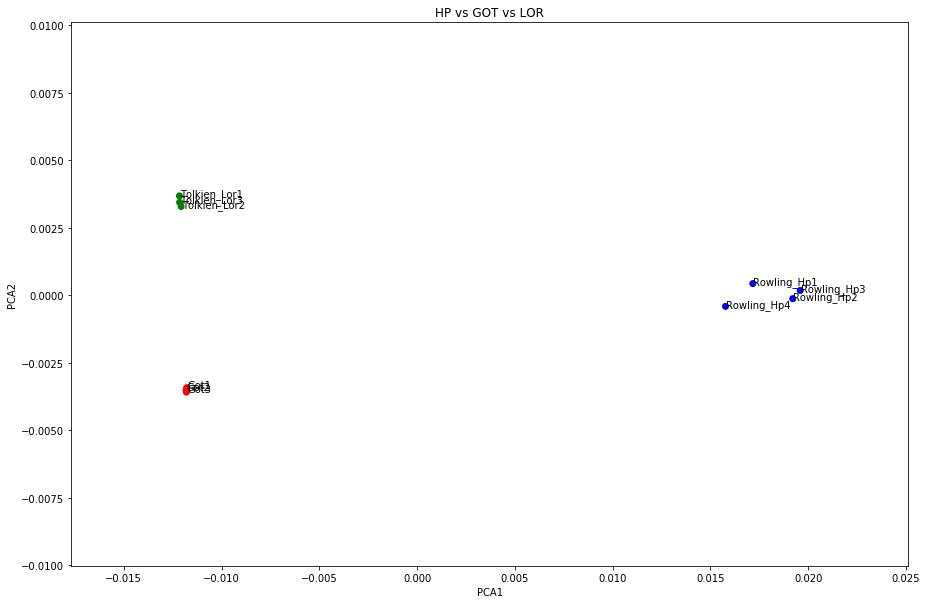

In [45]:
# define x and y data
x = transformed[:,0]
y = transformed[:,1]

# define colors and labels
col_dict = {0:'red', 1:'blue', 2:'green'}
cols = [col_dict[l] for l in kmeans.labels_]

# create scatter plot
plt.figure(figsize=(15,10))
plt.scatter(x,y, c=cols)

# add text labels
for i, l in enumerate(labels):
     plt.text(x[i]+.00003,y[i]-.00001, l)
# for i, c in enumerate(pca.components_.transpose()[180:200]):
#     plt.arrow(0,0, c[0]/50, c[1]/50, alpha=.3, width=.00001)
#     plt.text(c[0]/50, c[1]/50, top_words[i])
# plot clusters
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('HP vs GOT vs LOR')
plt.show()